In [39]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

Load in my custom covid dataset

In [40]:
covidData = pd.read_csv("Covid 19 Infection rate .xlsx - Sheet1.csv")

In [41]:
covidData.drop(covidData.columns[covidData.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)
covidData = covidData.dropna(subset=["DE infections"])

In [42]:
covidData

,Delaware Day #,DE infections,DE increase in infections,DE Percent Increase,MD Day #,MD infections,MD increase in infections,MD percent increase infections,Califronia Day #,CA infections,CA increase in infections,CA percent increase,Texas Day #,Infections,Increase in infections,Percent Increase
0,1.0,1.0,0.0,0.0,1,3,0,0,1.0,53.0,53.0,0.0,1.0,5.0,5,0.0
1,2.0,4.0,3.0,300.0,2,3,0,0,2.0,60.0,7.0,13.0,2.0,5.0,#REF!,0.0
2,3.0,4.0,0.0,0.0,3,3,0,0,3.0,69.0,9.0,15.0,3.0,5.0,#REF!,0.0
3,4.0,6.0,2.0,50.0,4,5,2,67,4.0,88.0,19.0,28.0,4.0,12.0,7,140.0
4,5.0,7.0,1.0,17.0,5,5,0,0,5.0,114.0,26.0,30.0,5.0,15.0,3,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129.0,13624.0,195.0,1.0,124,72467,557,1,129.0,347634.0,11126.0,3.0,129.0,264313.0,5655,2.0
129,130.0,13746.0,122.0,1.0,125,73109,642,1,130.0,356178.0,8544.0,2.0,130.0,275058.0,10745,4.0
130,131.0,13792.0,46.0,0.0,126,73527,418,1,131.0,366164.0,9986.0,3.0,131.0,282365.0,7307,3.0
131,132.0,13924.0,132.0,1.0,127,74260,733,1,132.0,375363.0,9199.0,3.0,132.0,292656.0,10291,4.0


In [43]:
covidDEMean = covidData["DE infections"].mean().round(0)
print(f"Mean of Covid 19 infections through Delaware during the first months of covid is {covidDEMean} infections")

Mean of Covid 19 infections through Delaware during the first months of covid is 6743.0 infections


In [44]:
covidDEMedian = covidData["DE infections"].median().round(0)
print(f"Median of Covid 19 infections through Delaware during the first months of covid is {covidDEMedian}")

Median of Covid 19 infections through Delaware during the first months of covid is 7869.0


In [45]:
sb.set_theme(style="darkgrid")

<Axes: xlabel='Delaware Day #', ylabel='DE infections'>

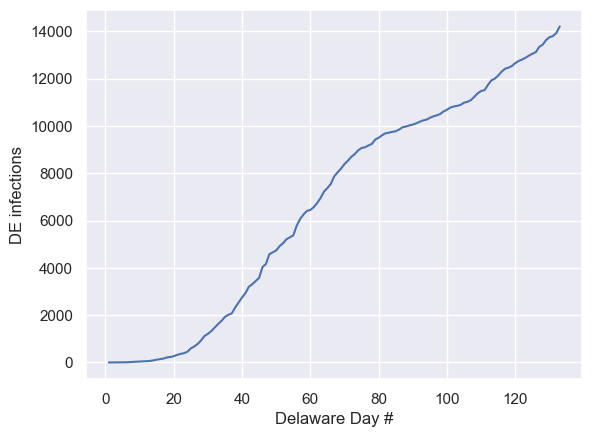

In [46]:
sb.lineplot(x=covidData["Delaware Day #"], y=covidData["DE infections"], data=covidData)

Up here we have a good graph of the Covid cases throughout Delaware within the first four months the first case appeared in the state

Now we will measure how often the cases increased throughout the state

<Axes: xlabel='Delaware Day #', ylabel='DE increase in infections '>

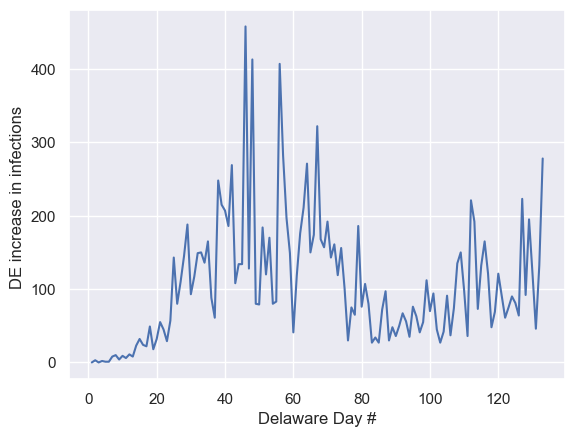

In [47]:
sb.lineplot(x=covidData["Delaware Day #"], y=covidData["DE increase in infections "], data=covidData, linewidth=1.5)

<Axes: xlabel='Delaware Day #', ylabel='DE Percent Increase'>

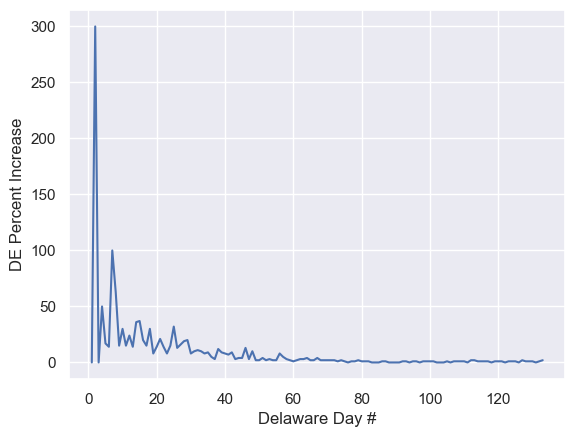

In [48]:
sb.lineplot(x=covidData["Delaware Day #"], y=covidData["DE Percent Increase"], data=covidData, linewidth=1.5)

Now we will train a regression model given the data within Delaware

In [49]:
X = covidData.drop(columns=["Delaware Day #", "DE increase in infections ", "DE Percent Increase", "MD Day #","MD infections", "MD increase in infections","MD percent increase infections", "Califronia Day #", "CA infections", "CA increase in infections","CA percent increase","Texas Day #","Infections", "Increase in infections","Percent Increase"])
y = covidData["DE infections"]

In [50]:
X

,DE infections
0,1.0
1,4.0
2,4.0
3,6.0
4,7.0
...,...
128,13624.0
129,13746.0
130,13792.0
131,13924.0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [52]:
svrScalar = StandardScaler()

In [53]:
X_train

,DE infections
39,2745.0
55,5778.0
112,11923.0
49,4734.0
89,10056.0
...,...
71,8690.0
22,393.0
75,9096.0
15,143.0


In [54]:
X_train_scaled = svrScalar.fit_transform(X_train)
X_test_scaled = svrScalar.transform(X_test)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}

In [55]:
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
             scoring='r2')

In [56]:
best_svr = grid_search.best_estimator_
best_svr.fit(X_train_scaled, y_train)
y_pred = best_svr.predict(X_test_scaled)

In [57]:
y_pred

array([ 8840.13444803, 10389.87202462,  7914.64040938,  9646.19654783,
        3316.84057926,  4767.99018959,  3315.96046063,  3751.30460754,
        3301.04893526,  3266.20094705,  9164.99548722,  3974.82130357,
        9765.44433309,  9520.35837197, 10312.10532093,  3315.96046063,
        3314.79032116,  5395.07304115, 10179.78439491, 10469.22294612,
        4702.39512033,  3357.87308053,  5318.99220029, 10231.4879815 ,
        4380.04981777,  3150.0734605 ,  8244.46956503])

In [58]:
y_test

72      8809.0
107    11226.0
66      7869.0
84      9773.0
0          1.0
48      4655.0
1          4.0
41      3200.0
11        56.0
35      2014.0
76      9171.0
44      3576.0
86      9942.0
80      9605.0
104    10980.0
2          4.0
5          8.0
54      5371.0
127    13429.0
116    12414.0
47      4575.0
37      2323.0
53      5288.0
100    10775.0
46      4162.0
28      1116.0
68      8194.0
Name: DE infections, dtype: float64

In [59]:
finalAccuracyCovidCasesDe = (r2_score(y_test.values, y_pred) * 100).round()

In [60]:
print(f"The accuracy of training an SVR on the Delaware days and the covid cases throughout the state is {finalAccuracyCovidCasesDe}%")

The accuracy of training an SVR on the Delaware days and the covid cases throughout the state is 84.0%


Evaluating it with r2 gives it an accuracy of 84%, as it fitted the data pretty well.

In [74]:
X = covidData.drop(columns=["Delaware Day #", "DE infections","DE increase in infections ", "DE Percent Increase", "MD Day #", "MD increase in infections","MD percent increase infections", "Califronia Day #", "CA infections", "CA increase in infections","CA percent increase","Texas Day #","Infections", "Increase in infections","Percent Increase"])